In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/Seung kyu Hong/Desktop/ba.csv")

In [3]:
data.head()

,Date,Daily_Confirmed,traveled,Domestic_Air_Seoul_In,trendTotal,meanTemperature,dailyTemperatureRange,rolling_3,Policy_1,Policy_3
0,2020.3.1,6,0,216,67.79557,7.7,8.5,8.666667,0,1
1,2020.3.2,6,0,216,58.14908,5.8,6.9,6.333333,0,1
2,2020.3.3,1,0,215,73.62835,3.4,7.6,5.666667,0,1
3,2020.3.4,5,1,215,61.54096,4.8,10.2,4.333333,0,1
4,2020.3.5,1,0,215,55.16472,2.2,5.9,4.000000,0,1


In [5]:
data.loc[214]

Date                     2020.10.1
Daily_Confirmed                 11
traveled                         0
Domestic_Air_Seoul_In          238
trendTotal                 6.55795
meanTemperature               19.6
dailyTemperatureRange          9.5
rolling_3                  30.6667
Policy_1                         0
Policy_3                         0
Name: 214, dtype: object

In [6]:
x = data.drop(['Date','Daily_Confirmed'],axis=1)

In [7]:
y = data['Daily_Confirmed']

In [90]:
trainx = x[:214]
trainy = y[:214]
testx = x[214:]
testy = y[214:]

In [86]:
from sklearn.linear_model import ElasticNet , Lasso, Ridge, LinearRegression

In [87]:
ela = ElasticNet(alpha=0.1)
la = Lasso(alpha=0.1)
ri = Ridge(alpha=0.1)
li = LinearRegression()

In [91]:
ela.fit(trainx,trainy)
la.fit(trainx,trainy)
ri.fit(trainx,trainy)
li.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
(testy - li.predict(testx)).mean()

3.7879645835948224

In [29]:
(testy-ela.predict(testx)).mean()

3.144819489721919

In [15]:
trainx.head()

,traveled,Domestic_Air_Seoul_In,trendTotal,meanTemperature,dailyTemperatureRange,rolling_3,Policy_1,Policy_3
0,0,216,67.79557,7.7,8.5,8.666667,0,1
1,0,216,58.14908,5.8,6.9,6.333333,0,1
2,0,215,73.62835,3.4,7.6,5.666667,0,1
3,1,215,61.54096,4.8,10.2,4.333333,0,1
4,0,215,55.16472,2.2,5.9,4.000000,0,1


In [17]:
trainy.head()

0    6
1    6
2    1
3    5
4    1
Name: Daily_Confirmed, dtype: int64

In [18]:
testy.head()

214    11
215    26
216    16
217    19
218    18
Name: Daily_Confirmed, dtype: int64

In [30]:
feature = pd.Series(index=trainx.columns,data=np.abs(ela.coef_))

In [31]:
selected_features = (feature>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(selected_features,(1-selected_features/len(feature))*100))

8 features, reduction of 0.00%


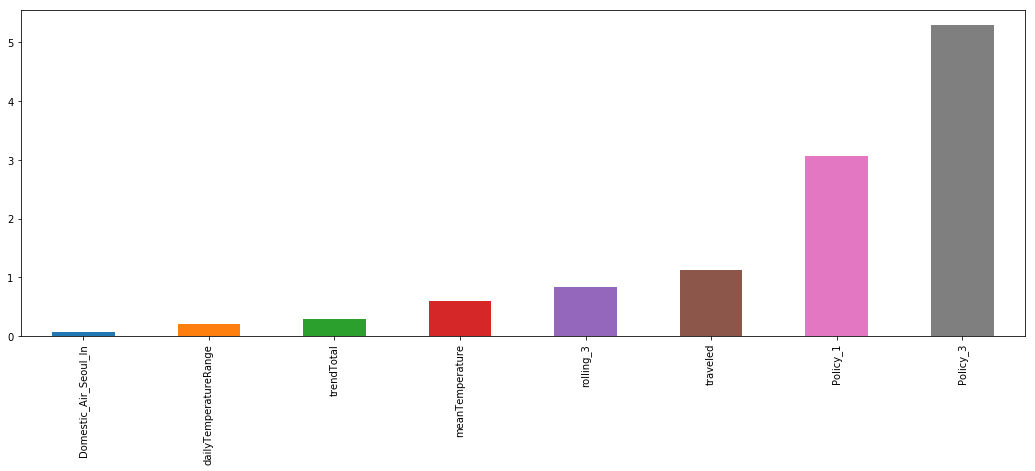

In [34]:
feature.sort_values().tail(30).plot(kind = 'bar',figsize=(18,6))

In [33]:
%matplotlib inline

In [35]:
ela.coef_

array([ 1.1182873 ,  0.05873432,  0.28995881,  0.59489772, -0.19689488,
        0.83608836, -3.06131104, -5.29027226])

In [36]:
import matplotlib.pyplot as plt

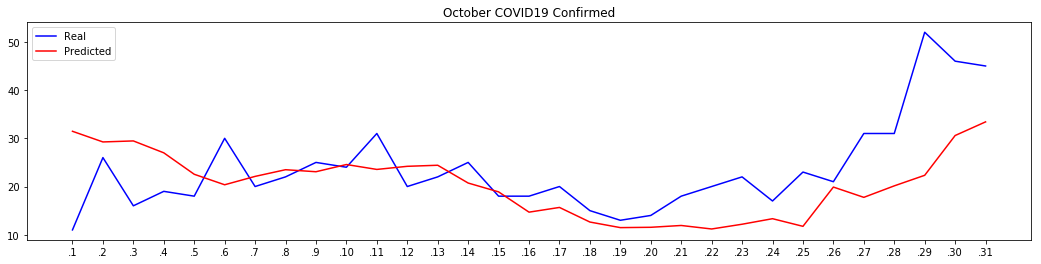

In [85]:
fig = plt.figure(figsize=(18,4))
chart = fig.add_subplot(1,1,1)
chart.plot(testy,color='blue',label='Real')
chart.plot(predicted,color='red',label='Predicted')
plt.title("October COVID19 Confirmed")
plt.legend(loc='best')

In [80]:
testy.index = a[214:]

In [81]:
predicted = pd.DataFrame(data=ela.predict(testx),index=a[214:])

In [79]:
a = []
b = []
for i in range(len(data['Date'])):
    a.append(data['Date'][i][7:])
   

In [73]:
testy.index[1][:]

''

In [98]:
data['Domestic_Air_Seoul_In']

0      216
1      216
2      215
3      215
4      215
5      215
6      215
7      215
8      215
9      213
10     213
11     213
12     213
13     210
14     210
15     207
16     207
17     207
18     207
19     207
20     208
21     208
22     203
23     203
24     202
25     201
26     199
27     191
28     146
29     147
      ... 
215    237
216    237
217    237
218    234
219    215
220    215
221    220
222    219
223    219
224    219
225    218
226    218
227    218
228    218
229    218
230    218
231    218
232    218
233    218
234    217
235    217
236    217
237    217
238    234
239    243
240    243
241    244
242    243
243    248
244    248
Name: Domestic_Air_Seoul_In, Length: 245, dtype: int64

In [65]:
b

['10.1',
 '10.2',
 '10.3',
 '10.4',
 '10.5',
 '10.6',
 '10.7',
 '10.8',
 '10.9',
 '10.10',
 '10.11',
 '10.12',
 '10.13',
 '10.14',
 '10.15',
 '10.16',
 '10.17',
 '10.18',
 '10.19',
 '10.20',
 '10.21',
 '10.22',
 '10.23',
 '10.24',
 '10.25',
 '10.26',
 '10.27',
 '10.28',
 '10.29',
 '10.30',
 '10.31']